In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Libraries

import tensorflow
import theano
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset_train = pd.read_csv('/content/drive/My Drive/Google_Stock_Price_Train.csv')

In [7]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
training_set = dataset_train.iloc[:, 1:2].values
training_set.shape

(1258, 1)

# Feature Scaling

In [0]:
# normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape, y_train.shape 

((1198, 60), (1198,))

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [58]:
#Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'sgd', loss = 'mse')

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, 
                        epochs = 100, 
                        batch_size = 32,
                        )



Epoch 1/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.1151
Epoch 2/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0667
Epoch 3/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0637
Epoch 4/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0595
Epoch 5/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0552
Epoch 6/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0499
Epoch 7/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0424
Epoch 8/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0348
Epoch 9/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0251
Epoch 10/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0167
Epoch 11/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0102
Epoch 12/100
1198/1198 [============================

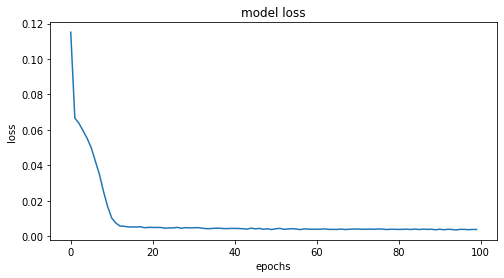

In [59]:
plt.figure(figsize=(8,4))

plt.plot(history.history['loss'], label='Train Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [60]:
#Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/My Drive/Google_Stock_Price_Test.csv')
# y_test
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)

(80, 1)


In [61]:
X_test.shape[0]

20

In [0]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
# batch_size,timesteps, units)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



y_pred = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(y_pred)


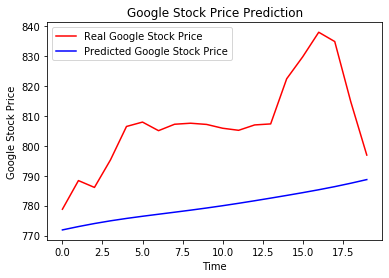

In [63]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# print('Train Mean Absolute Error:', mean_absolute_error(y_train, predicted_stock_price[:,0]))
# print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train, train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(real_stock_price, predicted_stock_price[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price[:,0])))

Test Mean Absolute Error: 27.561845947265617
Test Root Mean Squared Error: 29.99439371412344


In [65]:
model_history = history.history
print(model_history.keys())

dict_keys(['loss'])
